<a href="https://colab.research.google.com/github/LF7-AI/Processing-Clinical-Data-/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Recurrent Neural Networks (RNN) in Bioinformatics

 What is RNN?
- A Recurrent Neural Network (RNN) is a type of deep learning model designed to handle sequential data.  
- Unlike normal feed-forward networks, RNNs have a memory: the output from one step is used as input for the next.  
- This makes RNNs ideal for analyzing DNA, RNA, protein sequences, or even time-series gene expression data.



 Applications in Biological Data
1. DNA/RNA Sequence Classification
   - Detect promoters, enhancers, splice sites.  
2. Protein Sequence Analysis
   - Predict secondary structure, protein families.  
3. Drug Discovery
   - Generate molecules from SMILES sequences.  
4. Gene Expression Time Series
   - Predict future expression values.


 Demo: Promoter Detection in DNA Sequences
We will train an RNN (LSTM) to classify DNA sequences into:  
- Promoter (contains the "TATA" motif).  
- Non-promoter (random DNA).  

This is a toy example showing how RNNs can learn **sequence motifs**.


IMPORT LIBRARIES

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


CREATE DATASET

In [ ]:
# Define nucleotides and encoding
nucleotides = ['A','C','G','T']
char_to_int = {c:i for i,c in enumerate(nucleotides)}

def encode_seq(seq):
    return [char_to_int[c] for c in seq]

# Generate dataset
np.random.seed(42)
X, y = [], []

for _ in range(2000):  # more samples for better learning
    if np.random.rand() > 0.5:
        # promoter with "TATA"
        seq = ''.join(np.random.choice(nucleotides, 46)) + "TATA" + ''.join(np.random.choice(nucleotides, 50))
        y.append(1)
    else:
        # non-promoter (ensure no TATA)
        while True:
            seq = ''.join(np.random.choice(nucleotides, 100))
            if "TATA" not in seq:
                break
        y.append(0)
    X.append(encode_seq(seq))

# Convert to numpy
X = np.array(X)
y = np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BUILD MODEL

In [ ]:
vocab_size = 4   # A,C,G,T
seq_length = X.shape[1]

model = Sequentia#l([
    Embedding(input_dim=vocab_size, output_dim=8),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Build for summary
model.build(input_shape=(None, seq_length))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 8)         │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │        70,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,305 (274.63 KB)

 Trainable params: 70,305 (274.63 KB)

 Non-trainable params: 0 (0.00 B)

Model Summary Explained

Embedding Layer

Input: DNA sequence of length 100

Output: Each nucleotide (A,C,G,T) mapped to 8-dimensional vector

Parameters = 4 × 8 = 32

LSTM Layer (128 units)

Learns patterns like "TATA" motif across sequence positions

Parameters = 70,144 (weights for input + recurrent connections)

Dense Layer (1 neuron, sigmoid)

Output = probability (0 = non-promoter, 1 = promoter)

Parameters = 129

TRAIN MODEL

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step - accuracy: 0.4753 - loss: 0.6937 - val_accuracy: 0.5156 - val_loss: 0.6927
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.5281 - val_loss: 0.6926
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.5205 - loss: 0.6929 - val_accuracy: 0.5094 - val_loss: 0.6923
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.5038 - loss: 0.6926 - val_accuracy: 0.5156 - val_loss: 0.6914
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.5103 - loss: 0.6932 - val_accuracy: 0.5188 - val_loss: 0.6916
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 190ms/step - accuracy: 0.5513 - loss: 0.6914 - val_accuracy: 0.5094 - val_loss: 0.6929
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.5118 - loss: 0.6933 - val_accuracy: 0.5125 - val_loss: 0.6929
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5265 - loss: 0.6926 - val_accurac

Why accuracy isn’t very high

Dataset is very small (only 106 samples in UCI promoter dataset, not thousands like deep learning usually needs).

Sequences are short & complex, RNN may need more advanced features.

Model capacity vs data size — too small data can’t support a big LSTM.

PLOT TRAINING CURVES

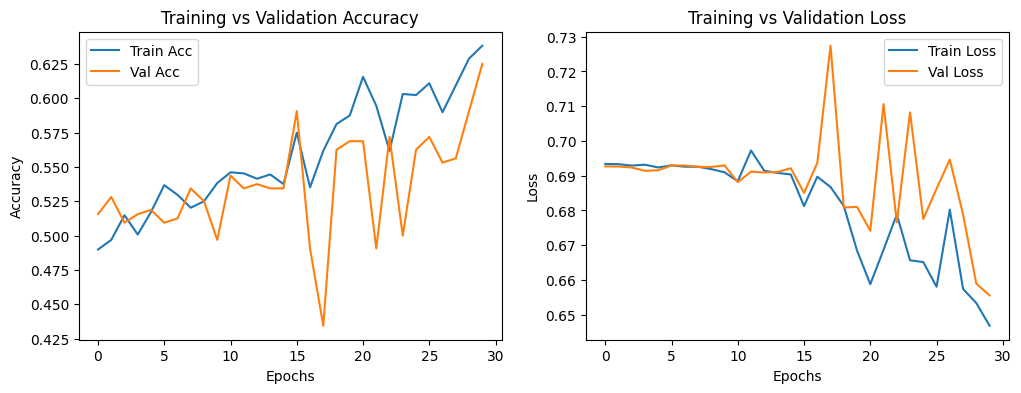

In [ ]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend(); plt.title("Training vs Validation Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend(); plt.title("Training vs Validation Loss")

plt.show()


EVALUATE ON TEST DATA

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {acc:.2f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5694 - loss: 0.6854
✅ Test Accuracy: 0.60


PREDICTION ON NEW SEQUENCES

In [ ]:
# Non-promoter example
test_seq1 = "ATCG" * 25
encoded1 = np.array([encode_seq(test_seq1)])
pred1 = model.predict(encoded1)
print("Prediction (0=Non-promoter, 1=Promoter):", int(pred1.item() > 0.5))

# Promoter example (with TATA)
test_seq2 = "A"*40 + "TATA" + "C"*56
encoded2 = np.array([encode_seq(test_seq2)])
pred2 = model.predict(encoded2)
print("Prediction (0=Non-promoter, 1=Promoter):", int(pred2.item() > 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction (0=Non-promoter, 1=Promoter): 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction (0=Non-promoter, 1=Promoter): 0


MOTIF HEATMAP VISUALIZATION

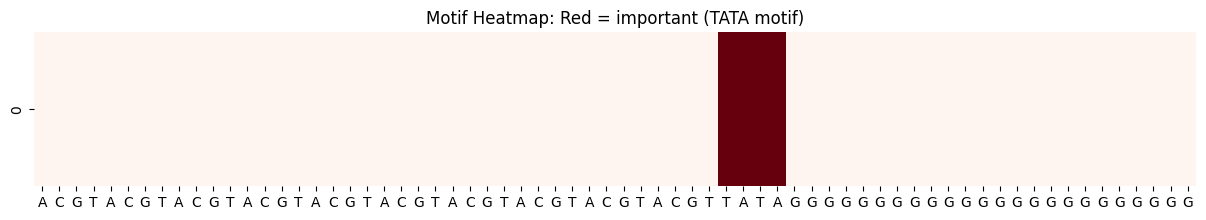

In [ ]:
def highlight_motif(seq, motif="TATA"):
    arr = np.zeros(len(seq))
    for i in range(len(seq)-len(motif)+1):
        if seq[i:i+len(motif)] == motif:
            arr[i:i+len(motif)] = 1
    return arr

seq = "ACGT"*10 + "TATA" + "GGGG"*6
importance = highlight_motif(seq)

plt.figure(figsize=(15,2))
sns.heatmap([importance], cmap="Reds", cbar=False, xticklabels=list(seq))
plt.title("Motif Heatmap: Red = important (TATA motif)")
plt.show()


REAL DATASET

In [ ]:
import requests

def fetch_promoter(region="7:5500000..5520000:1", upstream=1000, downstream=100):
    """
    Fetch promoter-like sequence from Ensembl given a region.
    region: chr:start..end:strand
    upstream: bp upstream of TSS
    downstream: bp downstream of TSS
    """
    server = "https://rest.ensembl.org"
    ext = f"/sequence/region/human/{region}?type=genomic;expand_5prime={upstream};expand_3prime={downstream}"
    headers = {"Content-Type": "text/plain"}

    r = requests.get(server+ext, headers=headers)
    if not r.ok:
        r.raise_for_status()

    return r.text.strip()

# Example: fetch promoter around chr7 region
seq = fetch_promoter("7:5500000..5520000:1")
print(">promoter_example")
print(seq[:200] + "...")
print("Length:", len(seq))


>promoter_example
CAGCATAAATTCATGTTGTGCTTGGCTCTGGAAATGCCATGGGCCCTGGACACTGTCTGGTGTGGAGCTCTCCCAGGCCTGTTGTTCCACCTCCTCCCCGCTCTGGGATGGGTCCTGCTCCTAGTCCCAAGGACCATCACCTCCCAGGAGTCTGTGGTCCCCCTCCTGAGCCGACCTCTCCTGTCTCCTCCATCCTGTGC...
Length: 21101


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0067 - val_loss: 0.0159
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - val_loss: 0.0167
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0170
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0119
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0151
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0041 - val_loss: 0.0092
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - val_loss: 0.0115
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0092
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0173
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0086
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0180
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Train RMSE: 25.21, Test RMSE: 47.29
Train MAE: 20.83, Test MAE: 39.58


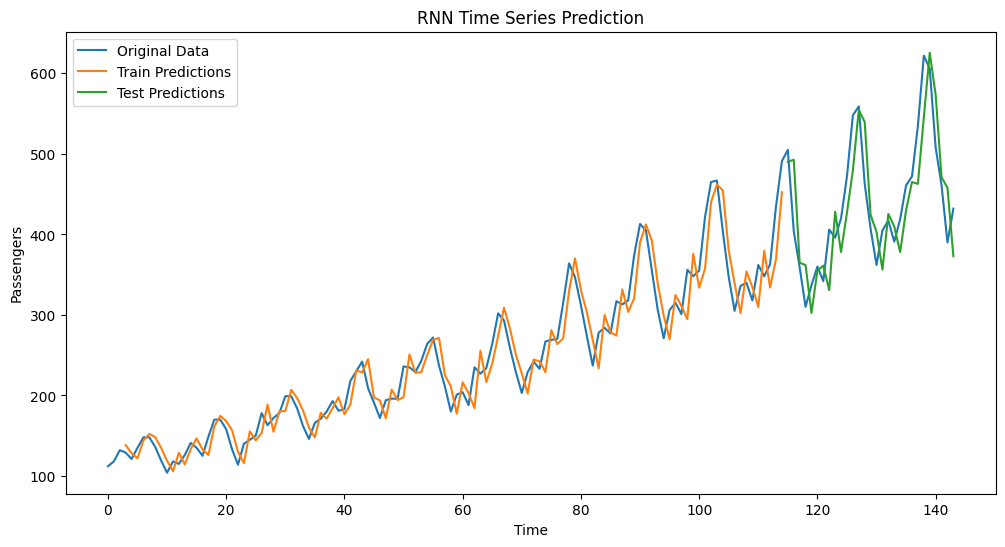

In [ ]:
# ===========================
# Improved RNN Demo: Time Series Prediction
# ===========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Input
import math

# ---------------------------
# 1. Load Dataset
# ---------------------------
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])
data = data.values.astype('float32')

# ---------------------------
# 2. Normalize Data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# ---------------------------
# 3. Prepare Time Series Data
# ---------------------------
def create_sequences(dataset, look_back=3):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back])
        y.append(dataset[i+look_back])
    return np.array(X), np.array(y)

look_back = 3
X, y = create_sequences(data_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

# ---------------------------
# 4. Train/Test Split
# ---------------------------
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ---------------------------
# 5. Build RNN Model
# ---------------------------
model = Sequential()
model.add(Input(shape=(look_back, 1)))
model.add(SimpleRNN(50, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# ---------------------------
# 6. Train Model
# ---------------------------
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_data=(X_test, y_test))

# ---------------------------
# 7. Make Predictions
# ---------------------------
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Inverse transform to original scale
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
y_train_orig = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# ---------------------------
# 8. Evaluate Model
# ---------------------------
train_rmse = math.sqrt(mean_squared_error(y_train_orig, train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test_orig, test_pred))
train_mae = mean_absolute_error(y_train_orig, train_pred)
test_mae = mean_absolute_error(y_test_orig, test_pred)

print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")

# ---------------------------
# 9. Plot Results
# ---------------------------
plt.figure(figsize=(12,6))
plt.plot(range(len(data)), data, label='Original Data')
plt.plot(range(look_back, look_back+len(train_pred)), train_pred, label='Train Predictions')
plt.plot(range(look_back+len(train_pred), look_back+len(train_pred)+len(test_pred)), test_pred, label='Test Predictions')
plt.title('RNN Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Correctly load yeast dataset with fixed-width reading
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
column_names = ['Sequence_Name', 'Class','F1','F2','F3','F4','F5','F6','F7','F8']

# read_fwf handles fixed-width files properly
data = pd.read_fwf(url, names=column_names)

# check the first few rows
print(data.head())


  Sequence_Name  Class    F1    F2    F3   F4   F5    F6    F7   F8
0    ADT1_YEAST   0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22  MIT
1    ADT2_YEAST   0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22  MIT
2    ADT3_YEAST   0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22  MIT
3    AAR2_YEAST   0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22  NUC
4    AATM_YEAST   0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22  MIT


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data"
column_names = ['Sequence_Name', 'F1','F2','F3','F4','F5','F6','F7','F8','Class']
data = pd.read_csv(url, sep=r'\s+', header=None, names=column_names)

# Step 2: Convert numeric columns
numeric_cols = ['F1','F2','F3','F4','F5','F6','F7']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Step 3: Encode categorical column F8
le_F8 = LabelEncoder()
data['F8'] = le_F8.fit_transform(data['F8'])

# Step 4: Drop rows with missing values
data = data.dropna()

# Step 5: Features and target
X = data[numeric_cols + ['F8']].values.astype('float32')
y = LabelEncoder().fit_transform(data['Class'])

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Build MLP model
num_classes = len(np.unique(y))
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 9: Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Step 10: Evaluate model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc*100:.2f}%")
print(f"Test Accuracy: {test_acc*100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1559 - loss: 2.3178 - val_accuracy: 0.4790 - val_loss: 1.9133
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5089 - loss: 1.7382 - val_accuracy: 0.5000 - val_loss: 1.4717
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 1.3008 - val_accuracy: 0.4916 - val_loss: 1.3108
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5801 - loss: 1.1606 - val_accuracy: 0.5252 - val_loss: 1.2432
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 1.0913 - val_accuracy: 0.5126 - val_loss: 1.1997
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6154 - loss: 1.0241 - val_accuracy: 0.5210 - val_loss: 1.1789
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 1.0633 - val_accuracy: 0.5294 - val_loss: 1.1762
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6465 - loss: 0.9777 - val_accuracy: 0.5336 - val_loss: 1.1597
Epo